Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.3176 - loss: 1.8791 - val_accuracy: 0.3817 - val_loss: 1.7304
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.3957 - loss: 1.6813 - val_accuracy: 0.4174 - val_loss: 1.6430
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.4309 - loss: 1.5900 - val_accuracy: 0.4527 - val_loss: 1.5584
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.4532 - loss: 1.5279 - val_accuracy: 0.4529 - val_loss: 1.5243
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.4695 - loss: 1.4885 - val_accuracy: 0.4467 - val_loss: 1.5547
Test Loss: 1.5547
Test Accuracy: 0.4467


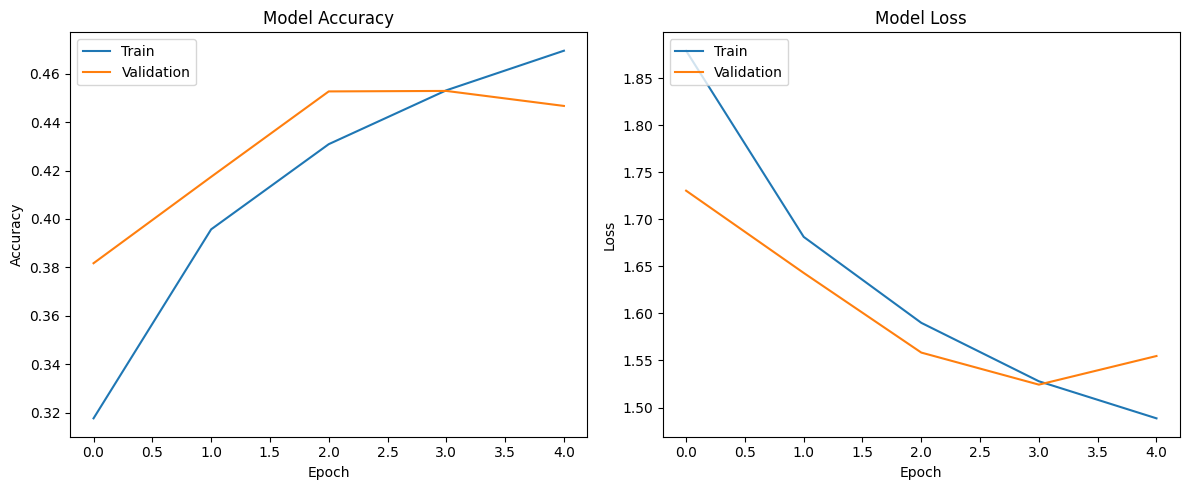

In [3]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


model = Sequential([
    Flatten(input_shape=(32, 32, 3)),#convert 2d image into 1d array 
    Dense(512, activation='relu'),   # First hidden layer
    Dense(256, activation='relu'),   # Second hidden layer
    Dense(128, activation='relu'),   # Third hidden layer
    Dense(num_classes, activation='softmax') # Output layer for 10 classes
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train,epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()